# Lab UBA-IA
## Modelo de detección de anomalías en Keras
Por [Pablo Casas](https://www.linkedin.com/in/pcasas/) 

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")
!ls

Mounted at /content/drive
'03 - Introducción a la clasificación con Keras'
'04 - Detección de anomalías con Keras'
'05 - Embeddings con Keras'
'06 - Autoencoders con Keras'
'07 - Integrador.ipynb'
'CV2 - 01 - Capas_convolucionales.ipynb'
'CV2 - 02 red_cnn_simple.ipynb'
'CV2 - 03 Modelo_convolucional_aplicacion_keras.ipynb'
 data
 desorden
'Machine Learning 1 - 8.1 Boosting.ipynb'
'Machine Learning 1 - 8.2 Bagging.ipynb'
 model_plot.png
 model.png
 models


In [2]:
!nvidia-smi

Sat Oct 24 13:23:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
! pip install funpymodeling
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars
from funpymodeling.data_prep import todf

     |████████████████████████████████| 225kB 6.1MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv('data/creditcard.csv')

In [6]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Time,0,0.0,2,0.000007,124592,float64
1,V1,0,0.0,0,0.000000,275663,float64
2,V2,0,0.0,0,0.000000,275663,float64
3,V3,0,0.0,0,0.000000,275663,float64
4,V4,0,0.0,0,0.000000,275663,float64
5,V5,0,0.0,0,0.000000,275663,float64
6,V6,0,0.0,0,0.000000,275663,float64
7,V7,0,0.0,0,0.000000,275663,float64
8,V8,0,0.0,0,0.000000,275663,float64
9,V9,0,0.0,0,0.000000,275663,float64


## Preparación de datos



In [7]:
from keras.utils import to_categorical 

data_x=data.drop('Class', axis=1)
data_y=data['Class']

#data_y=to_categorical(data['Class']) # con esto hay que usar softmax

In [8]:
# Normalización

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_x = scaler.fit_transform(data_x)

In [9]:
data_x

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

In [11]:
x_train.shape

(227845, 30)

In [12]:
y_train.shape

(227845,)

#### Entrenando el modelo

In [13]:
# Carga de libs

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
_, in_shape = x_train.shape

Clase: Explicar última capa

In [15]:
model = Sequential()
model.add(Dense(256, input_dim=in_shape)) 
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid")) 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
_________________________________________________________________


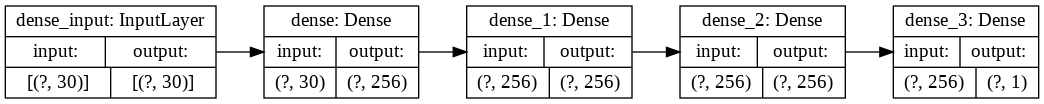

In [17]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [18]:
x_test.shape, y_test.shape

((56962, 30), (56962,))

Clase: Explicar metrics

In [20]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall")
]

model.compile(optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics)

In [21]:
history=model.fit(
    x_train,
    y_train,
    batch_size=2048,
    epochs=30,
    verbose=2,
    validation_data=(x_test, y_test)
)

Epoch 1/30
112/112 - 1s - loss: 1.1023 - fn: 376.0000 - fp: 4696.0000 - tn: 222765.0000 - tp: 8.0000 - precision: 0.0017 - recall: 0.0208 - val_loss: 0.6909 - val_fn: 108.0000 - val_fp: 0.0000e+00 - val_tn: 56854.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
112/112 - 1s - loss: 2.1231 - fn: 367.0000 - fp: 2408.0000 - tn: 225053.0000 - tp: 17.0000 - precision: 0.0070 - recall: 0.0443 - val_loss: 1.8329 - val_fn: 108.0000 - val_fp: 0.0000e+00 - val_tn: 56854.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
112/112 - 1s - loss: 2.3663 - fn: 377.0000 - fp: 2037.0000 - tn: 225424.0000 - tp: 7.0000 - precision: 0.0034 - recall: 0.0182 - val_loss: 8.6607 - val_fn: 108.0000 - val_fp: 0.0000e+00 - val_tn: 56854.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
112/112 - 1s - loss: 36.7148 - fn: 374.0000 - fp: 4089.0000 - tn: 223372.0000 - tp: 10.0000 - precision: 0.0024 

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_all(history):
  fig1 = go.Figure()
  fig1.add_trace(go.Scattergl(y=history.history['precision'], name='Train'))
  fig1.add_trace(go.Scattergl(y=history.history['val_precision'], name='Valid'))
  fig1.update_layout(height=300, width=400,xaxis_title='Epoch',yaxis_title='Precision')

  fig2 = go.Figure()
  fig2.add_trace(go.Scattergl(y=history.history['recall'], name='Train'))
  fig2.add_trace(go.Scattergl(y=history.history['val_recall'], name='Valid'))
  fig2.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='Recall')

  fig3 = go.Figure()
  fig3.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
  fig3.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
  fig3.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='Loss')

  return [fig1,fig2,fig3]

Clase: Analizar salida

In [26]:
fig1,fig2,fig3=plot_all(history)
fig1.show()
fig2.show()
fig3.show()

Clase: Completar el reporte semánticamente

In [27]:
tp=history.history['val_tp'][16]
tn=history.history['val_tn'][16]
fn=history.history['val_fn'][16] # es falso que es negativo, (porque es positivo)
fp=history.history['val_fp'][16]

print('El modelo acertó %s casos de fraude, pero clasificó mal como falsos a %s' % (tp, fp)) # el modelo dijo positive y no lo era
print('El modelo se salteó %s casos de fraude' % (fn))

El modelo acertó 0.0 casos de fraude, pero clasificó mal como falsos a 0.0
El modelo se salteó 108.0 casos de fraude


Ejercicios:

- Ver que pasa al variar el learning rate, ¿puede estabilizarse el `precision`?
- Modificar el batch size al doble, ¿qué pasa con el tiempo por step?
- ¿Cómo varia el aprendizaje en cada caso? ¿Converge mas rápido? ¿Más lento? ¿Oscila el `loss`?


## Agregando dropout como regularizador

Creamos otro modelo, se agrega entre capas. 

Son mas parametros para entrenar.

In [30]:
model2 = Sequential()

model2.add(Dense(256, input_dim=in_shape))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5)) 
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation="sigmoid"))

In [31]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
________________________________________________

In [32]:
model2.compile(optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics)

history2=model2.fit(
    x_train,
    y_train,
    batch_size=2048,
    epochs=17,
    verbose=2,
    validation_data=(x_test, y_test)
)

Epoch 1/17
112/112 - 1s - loss: 0.0211 - fn: 398.0000 - fp: 1522.0000 - tn: 282793.0000 - tp: 94.0000 - precision: 0.0582 - recall: 0.1911 - val_loss: 0.0070 - val_fn: 108.0000 - val_fp: 0.0000e+00 - val_tn: 56854.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/17
112/112 - 1s - loss: 0.0080 - fn: 384.0000 - fp: 0.0000e+00 - tn: 227461.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0058 - val_fn: 108.0000 - val_fp: 0.0000e+00 - val_tn: 56854.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/17
112/112 - 1s - loss: 0.0139 - fn: 366.0000 - fp: 86.0000 - tn: 227375.0000 - tp: 18.0000 - precision: 0.1731 - recall: 0.0469 - val_loss: 0.0072 - val_fn: 95.0000 - val_fp: 1.0000 - val_tn: 56853.0000 - val_tp: 13.0000 - val_precision: 0.9286 - val_recall: 0.1204
Epoch 4/17
112/112 - 1s - loss: 0.0054 - fn: 225.0000 - fp: 31.0000 - tn: 227430.0000 - tp: 159.0000 - precision: 0.8368 - reca

In [33]:
tp2=history2.history['val_tp'][16]
tn2=history2.history['val_tn'][16]
fn2=history2.history['val_fn'][16]
fp2=history2.history['val_fp'][16]

In [34]:
print('El modelo acertó %s casos de fraude, pero clasificó mal como falsos a %s' % (tp2, fp2))
print('El modelo se salteó %s casos de fraude' % (fn2))

El modelo acertó 89.0 casos de fraude, pero clasificó mal como falsos a 27.0
El modelo se salteó 19.0 casos de fraude


Antes del dropout teniamos:

In [35]:
print('El modelo acertó %s casos de fraude, pero clasificó mal como falsos a %s' % (tp, fp))
print('El modelo se salteó %s casos de fraude' % (fn))

El modelo acertó 0.0 casos de fraude, pero clasificó mal como falsos a 0.0
El modelo se salteó 108.0 casos de fraude


In [36]:
# Precision / recall:
prec2=history2.history['val_precision'][16]
recall2=history2.history['val_recall'][16]

In [37]:
# Antes del dropout, Precision:
# Precision / recall:
prec=history.history['val_precision'][16]
recall=history.history['val_recall'][16]

In [38]:
print('Precision ahora %s vs antes %s' % (round(prec2,2), round(prec,2))) # TP/(TP + FP)
print('Recall ahora %s vs antes %s' % (round(recall2,2), round(recall,2))) # TP/(TP + FN)

Precision ahora 0.77 vs antes 0.0
Recall ahora 0.82 vs antes 0.0


Analicemos los gráficos!

In [39]:
# Con dropout:
fig1,fig2,fig3=plot_all(history2)
fig1.show()
fig2.show()
fig3.show()

In [41]:
# Sin dropout:
fig1,fig2,fig3=plot_all(history)
fig1.show()
fig2.show()
fig3.show()

En clase:

- Analizar el loss.

- Analizar precision y recall.

Ejercicio: Hacer undersampling y correr (fit) el modelo2 con dropout. Tomar el 100% de los positive y sólo el 10% de los negative.

In [42]:
fraud= data[data['Class']==1]
no_fraud = data[data['Class']==0]
fraud_num_samples = fraud.shape[0]
no_fraud_num_samples = no_fraud.shape[0]

def perform_undersample(fraud_i1, no_fraud_i1):
  data_under = fraud.iloc[:fraud_i1].append(no_fraud.iloc[:no_fraud_i1],sort=False).reset_index()
  x_train_under = data_under.iloc[:,0:30]
  y_train_under = data_under.iloc[:,30]
  model2.compile(optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics)
  history=model2.fit(
      x_train_under,
      y_train_under,
      batch_size=2048,
      epochs=17,
      verbose=0,
      validation_data=(x_test, y_test)
  )
  fig1,fig2,fig3=plot_all(history)
  fig1.show()
  fig2.show()
  fig3.show()

In [43]:
# Ejercicio 1
fraud_i1=int(fraud_num_samples*1.0)
no_fraud_i1=int(no_fraud_num_samples*0.1)
perform_undersample(fraud_i1, no_fraud_i1)

Total registros: 1000

50 fraude
950 no fraude


Training:

50 fraude
150 no fraude (son 800 registros menos...es mas de lo mismo)
total: 200 registros


In [44]:
# Ejercicio 2
fraud_i1=50
no_fraud_i1=950
perform_undersample(fraud_i1, no_fraud_i1)

In [45]:
# Ejercicio 3
fraud_i1=50
no_fraud_i1=150
perform_undersample(fraud_i1, no_fraud_i1)